Se leen los ficheros csv de entrenamiento y de prueba

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

entrenamiento = pd.read_csv('train_final.csv')
prueba = pd.read_csv('test_final.csv')
test_ids = prueba['test_id']



Se crean los arrays con los datos de entrenamiento y de prueba

In [2]:
from sklearn.model_selection import train_test_split

X_entrenamiento = entrenamiento.drop(['is_female', 'train_id'], axis=1)
y_entrenamiento = entrenamiento['is_female']

X_prueba_drop = prueba.drop(['test_id'], axis=1)

X_entrenamiento, X_prueba, Y_entrenamiento, y_prueba = train_test_split(X_entrenamiento, y_entrenamiento, test_size=0.2, random_state=23)


Se instancian varios clasificadores y por cada uno de ellos se calcula la curva ROC, guardando el que siempre tenga mejor valor del área.

Nombre:Vecinos más cercanos Precisión:0.6020268419611066


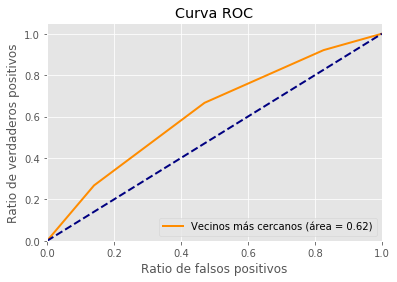

Nombre:Árbol de decision Precisión:0.8824979457682827


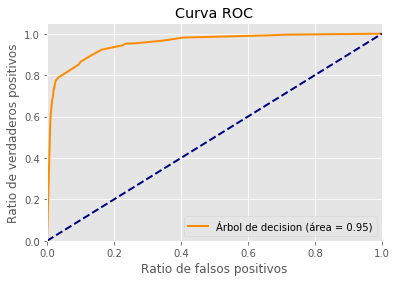

Nombre:Bosque aleatorio Precisión:0.6513284031772117


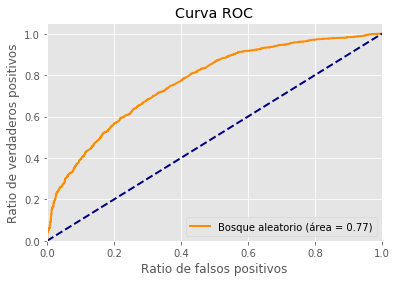

Nombre:Red neuronal Precisión:0.632155573815393


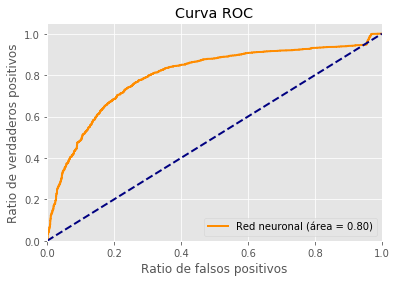

Nombre:AdaBoost Precisión:0.8060805258833197


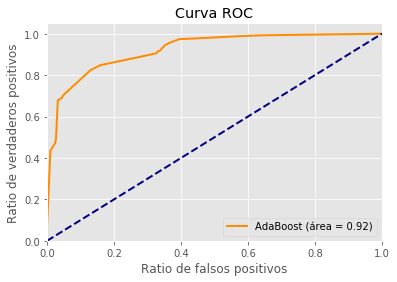

Nombre:Análisis discriminante cuadrático Precisión:0.599835661462613


c:\users\oscar\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


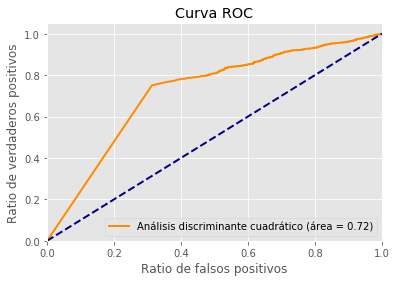

Mejor curva ROC:Árbol de decision con un área de 0.9529164435841673


In [9]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


def ROC(nombre, clf, X_prueba, y_prueba):
    plt.style.use('ggplot')

    y_predict_probabilities = clf.predict_proba(X_prueba)[:,1]

    fpr, tpr, _ = roc_curve(y_prueba, y_predict_probabilities)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='%s (área = %0.2f)' % (nombre, roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Ratio de falsos positivos')
    plt.ylabel('Ratio de verdaderos positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()
    return roc_auc

nombres = [
    'Vecinos más cercanos', 
    'Árbol de decision', 
    'Bosque aleatorio', 
    'Red neuronal', 
    'AdaBoost', 
    'Análisis discriminante cuadrático'
]

clasificadores = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=5),
    QuadraticDiscriminantAnalysis()
]

mejor_area = 0.0
mejor_nombre = None
mejor_clf = None

for nombre, clf in zip(nombres, clasificadores):
    print(f"Nombre:{nombre} ", end='')
    clf.fit(X_entrenamiento, Y_entrenamiento)
    predictions = clf.predict(X_prueba)
    print(f"Precisión:{accuracy_score(y_prueba, predictions)}")

    area = ROC(nombre, clf, X_prueba, y_prueba)
    if area > mejor_area:
        mejor_area = area
        mejor_nombre = nombre
        mejor_clf = clf

print(f"Mejor curva ROC:{mejor_nombre} con un área de {mejor_area}")


Con el mejor clasificador se extraen todos los datos de prueba y sus predicciones al fichero csv

In [10]:
salida = pd.DataFrame({ 'test_id' : test_ids, 'is_female': mejor_clf.predict_proba(X_prueba_drop)[:,1] })
#salida = pd.DataFrame({ 'test_id' : test_ids, 'is_female': mejor_clf.predict(X_prueba_drop)})
salida.to_csv('predictions.csv', index = False)
salida.head()


,test_id,is_female
0,0,0.984583
1,1,0.194842
2,2,0.984583
3,3,0.984583
4,4,0.508108
